# **Hypothesis Testing in Healthcare: Drug Safety**

**Background**

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are:

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups |
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. The goal is to know if the adverse reactions, if any, are of significant proportions.

In [4]:
! pip install pingouin

In [7]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

### **1. Performing Two-Sample Proportions Z-Test to compare the adverse effects between two treatment groups (Drug and Placebo)**

In [8]:
# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")
drug_safety

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


In [9]:
# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

adv_eff_by_trx

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64

In [10]:
# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

adv_eff_by_trx_totals

trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64

In [11]:
# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

yeses

[1024, 512]

In [12]:
# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

n

[10727, 5376]

The z-test was performed using the proportions_ztest function. It is used to compare the proportions of successes (adverse effects in this case) between two groups.

In [17]:
# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)
z_score, p_value = two_sample_results

print("Z-score:", z_score)
print("P-value:", p_value)

Z-score: 0.0452182684494942
P-value: 0.9639333330262475



The **z-score** measures the difference between observed proportions and expected randomness. A z-score of 0.0452 implies a slight deviation from expected proportions, suggesting that the observed values align closely with random chance.

The **p-value** represents the likelihood of getting a result like the one calculated, assuming the null hypothesis is correct. In hypothesis testing, a smaller p-value indicates stronger evidence against the null hypothesis. Our p-value is 0.9639, which is relatively large, suggesting the observed difference in proportions is likely due to random chance. A p-value above the common significance level (e.g., 0.05) means we lack strong evidence to reject the null hypothesis.

In summary, the results imply that the observed difference in proportions is not statistically significant, and any deviation from expected values is likely due to random chance.

In [14]:
# Store the p-value
two_sample_p_value = two_sample_results[1]


### **2. Performing Chi-squared test to fnd out if number of adverse effects is independent of the treatment and control groups**

In [21]:
# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")
num_effects_groups

/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.10/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


(trx                 Drug      Placebo
 num_effects                          
 0            9703.794883  4863.205117
 1             960.587096   481.412904
 2              58.621126    29.378874
 3               3.996895     2.003105,
 trx          Drug  Placebo
 num_effects               
 0            9703     4864
 1             956      486
 2              63       25
 3               5        1,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
 1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
 2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
 3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
 4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
 5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189)

**Observed Frequencies:**

The first table represents the observed frequencies for the combination of "num_effects" and "trx." Each cell in the table contains the actual counts.

**Expected Frequencies:**

The second table shows the expected frequencies assuming independence between "num_effects" and "trx."

**Test Statistics:**

The third table provides various test statistics and information.
chi2: The chi-squared test statistic.
dof: Degrees of freedom.
pval: The p-value, which is used to assess the statistical significance of the test.
cramer: Cramer's V, a measure of the strength of association.

**Conclusion:**

The p-values for various test statistics are relatively high (e.g., 0.615012), indicating that there is no significant evidence to reject the null hypothesis of independence between "num_effects" and "trx."
Cramer's V values are very close to zero, suggesting a weak association.

In summary, based on the chi-squared independence test, there is no strong evidence to suggest a significant association between "num_effects" and "trx" in the data. The observed frequencies align with the expected frequencies under the assumption of independence.

### **3. Mann-Whitney U test to assess whether there is a significant difference in the distribution of ages between two groups(Drug and Placebo).**

In [16]:
# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]
num_effects_p_value

0.6150123339426765

In [24]:

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
age_trx

0        62
1        62
2        62
3        62
4        62
         ..
16074    60
16075    60
16092    68
16093    68
16094    68
Name: age, Length: 10727, dtype: int64

In [25]:
# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]
age_placebo

32       73
33       73
34       73
35       73
36       73
         ..
16098    78
16099    78
16100    78
16101    78
16102    78
Name: age, Length: 5376, dtype: int64

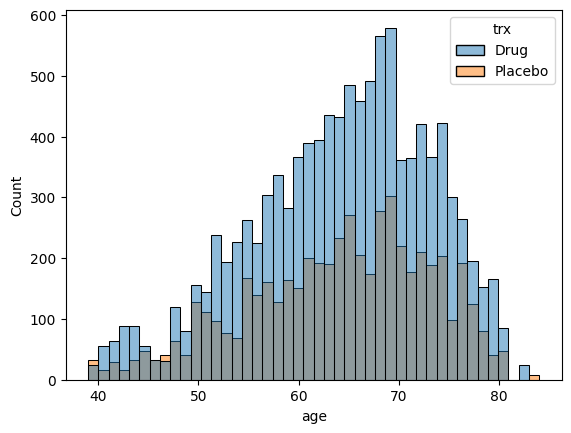

In [22]:
# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")
plt.show()

The histograms being similar suggests that there is an overlap in the age ranges of individuals in the Drug and Placebo groups. This implies that individuals with similar ages are present in both treatment groups.

The data distribution is not normal.

In [27]:
# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

age_group_effects

,U-val,alternative,p-val,RBC,CLES
MWU,29149339.5,two-sided,0.256963,-0.01093,0.505465


In [28]:
# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]

age_group_effects_p_value

MWU    0.256963
Name: p-val, dtype: float64

The Mann-Whitney U test indicates that there is no significant difference in age between the two groups (age_trx and age_placebo). The p-value of 0.256963 is greater than the common significance level of 0.05, suggesting insufficient evidence to reject the null hypothesis of no difference. The effect size is small (RBC close to zero), and the probability of age_trx being greater than age_placebo is approximately 50.5%. In summary, the data does not provide strong evidence for a difference in age distributions between the two groups.